In [1]:
import os
dataset_path="Animal and bird dataset"
categories=os.listdir(dataset_path)
print(categories)

['Bird', 'Cat', 'Deer', 'Dog', 'Duck', 'Frog', 'Goat', 'Horse', 'Lion', 'Tiger']


In [2]:
len(categories)

10

In [3]:
img_path=[]
labels=[]

for category in categories:
    folder_path=os.path.join(dataset_path,category) 
    
    for img in os.listdir(folder_path):
        file_path=folder_path+"/"+img
        img_path.append(folder_path)
        labels.append(category)

print(img_path[31:36])
labels[31:36]

['Animal and bird dataset\\Cat', 'Animal and bird dataset\\Cat', 'Animal and bird dataset\\Cat', 'Animal and bird dataset\\Cat', 'Animal and bird dataset\\Cat']


['Cat', 'Cat', 'Cat', 'Cat', 'Cat']

In [4]:
label_map={}

for id,label in enumerate(categories):
    label_map.update({label:id})
print(label_map)


{'Bird': 0, 'Cat': 1, 'Deer': 2, 'Dog': 3, 'Duck': 4, 'Frog': 5, 'Goat': 6, 'Horse': 7, 'Lion': 8, 'Tiger': 9}


In [5]:
y=[]

for label in labels:
    y.append(label_map[label])

print(y[31:36])

[1, 1, 1, 1, 1]


In [6]:
import os
from sklearn.model_selection import train_test_split

data_dir = "Animal and bird dataset"
img_paths = []
labels = []

# Collect image file paths and labels
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                img_paths.append(file_path)
                labels.append(folder)

print("Total images found:", len(img_paths))
print("Example path:", img_paths[0])


Total images found: 300
Example path: Animal and bird dataset\Bird\1.jpg


In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    img_paths, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Train images:", len(x_train))
print("Test images:", len(x_test))


Train images: 240
Test images: 60


In [8]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array

def preprocess_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    return img_array



In [9]:
# ---------- Train Preprocessing ----------
x_train1 = []
for img in x_train:
    if isinstance(img, str) and img.lower().endswith(('.jpg', '.jpeg', '.png')):
        x_train1.append(preprocess_image(img))
x_train1 = np.array(x_train1)
print("x_train1 shape:", x_train1.shape)


x_train1 shape: (240, 150, 150, 3)


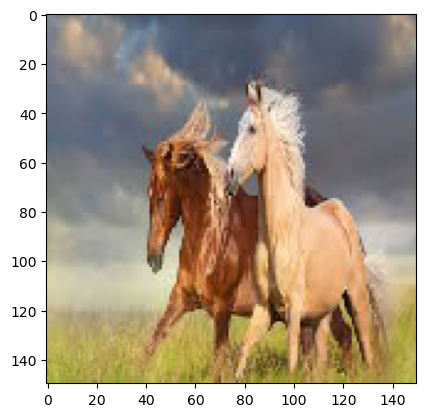

In [10]:
import matplotlib.pyplot as plt
plt.imshow(x_train1[5])

In [11]:
# ---------- Test Preprocessing ----------
x_test1 = []
for img in x_test:
    if isinstance(img, str) and img.lower().endswith(('.jpg', '.jpeg', '.png')):
        x_test1.append(preprocess_image(img))
x_test1 = np.array(x_test1)
print("x_test1 shape:", x_test1.shape)

x_test1 shape: (60, 150, 150, 3)


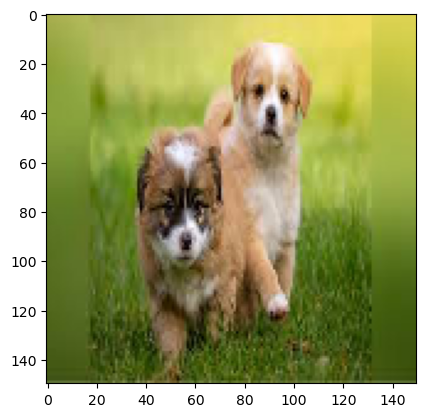

In [12]:
import matplotlib.pyplot as plt
plt.imshow(x_test1[5])

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [23]:
from tensorflow.keras.utils import to_categorical
y_train_encoded = to_categorical(y_train_encoded)
y_test_encoded = to_categorical(y_test_encoded)
print("Classes:", le.classes_)


Classes: ['Bird' 'Cat' 'Deer' 'Dog' 'Duck' 'Frog' 'Goat' 'Horse' 'Lion' 'Tiger']


In [25]:
#model creation
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(le.classes_), activation='softmax')  # output layer
])

c:\Users\sasan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [34]:
type(y_train)

list

In [35]:
type(x_train1)

numpy.ndarray

In [36]:
history = model.fit(
    x_train1, y_train_encoded,
    validation_data=(x_test1, y_test_encoded),
    epochs=15,
    batch_size=32
)

Epoch 1/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 243ms/step - accuracy: 0.0625 - loss: 2.4738 - val_accuracy: 0.1000 - val_loss: 2.2986
Epoch 2/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 199ms/step - accuracy: 0.0875 - loss: 2.3115 - val_accuracy: 0.2000 - val_loss: 2.2897
Epoch 3/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.1750 - loss: 2.2727 - val_accuracy: 0.1333 - val_loss: 2.2526
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.1708 - loss: 2.2810 - val_accuracy: 0.1833 - val_loss: 2.2357
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 252ms/step - accuracy: 0.2125 - loss: 2.1734 - val_accuracy: 0.2667 - val_loss: 2.1805
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 266ms/step - accuracy: 0.2250 - loss: 2.0766 - val_accuracy: 0.3500 - val_loss: 2.1549
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 269ms/step - accuracy: 0.3042 - loss: 2.0043 - val_accuracy: 0.2833 - val_loss: 2.0605
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.4750 - loss: 1.7832 - val_accuracy: 0.2833 - val_loss:

In [37]:
#Evaluate Model
loss, acc = model.evaluate(x_test1, y_test_encoded)
print(f"\n Test Accuracy: {acc*100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.3167 - loss: 2.4919

 Test Accuracy: 31.67%


In [49]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Folder path (choose a specific class folder)
folder_path = "Animal and bird dataset/Dog"

# Get one image file from that folder
img_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
img_path = os.path.join(folder_path, img_files[6])  # take first image

# Load & preprocess
img = load_img(img_path, target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
confidence = np.max(pred)

# Class labels
classes = ['Bird', 'Cat', 'Deer', 'Dog', 'Duck', 'Frog', 'Goat', 'Horse', 'Lion', 'Tiger']

print(f"Predicted Class: {classes[predicted_class]}  (Confidence: {confidence*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Class: Dog  (Confidence: 77.60%)


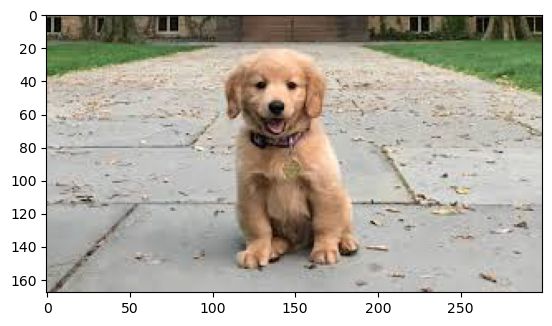

In [51]:
# Show image
plt.imshow(load_img(img_path))

In [70]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
folder_path = "Animal and bird dataset/Dog.jpg"

# Load & preprocess
img = load_img(img_path)
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

In [71]:
img_array.shape

(1, 168, 300, 3)

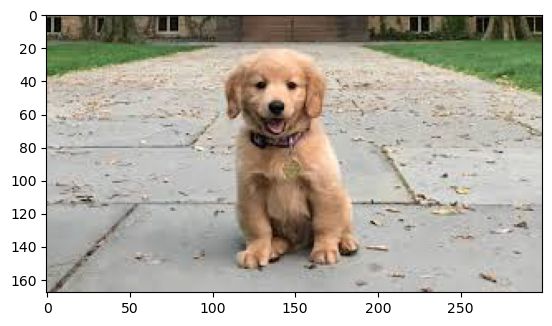

In [72]:
plt.imshow(img)

In [86]:
#data augmentation
#rotation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
generator=ImageDataGenerator(
    rotation_range=45
)

In [87]:
augment_img=generator.flow(img_array,batch_size=1)
augmented_img=next(augment_img)[0].astype('uint8')

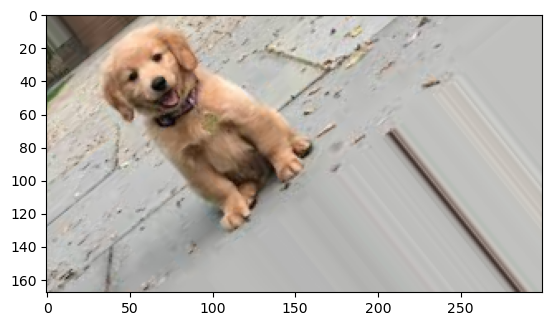

In [88]:
plt.imshow(augmented_img)

In [99]:
# height shift
generator=ImageDataGenerator(
    width_shift_range=0.2,
    height_shift_range=0.2 #0.2 means 20% of the width
)

In [100]:
augment_img=generator.flow(img_array,batch_size=1)
augmented_img=next(augment_img)[0].astype('uint8')

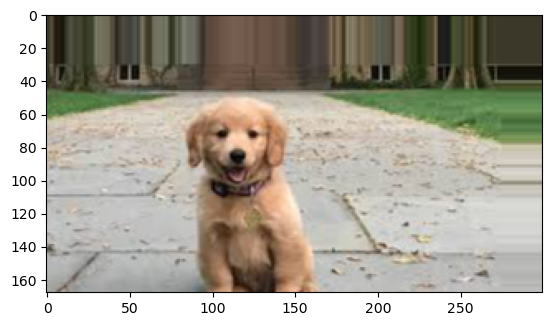

In [101]:
plt.imshow(augmented_img)

In [105]:
#brightness range
generator=ImageDataGenerator(
    brightness_range=(1.2,1.5)
)

In [106]:
augment_img=generator.flow(img_array,batch_size=1)
augmented_img=next(augment_img)[0].astype('uint8')

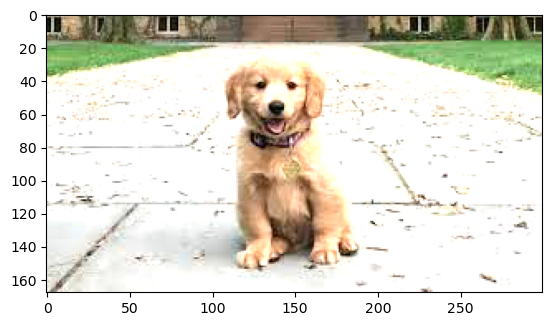

In [107]:
plt.imshow(augmented_img)

In [ ]:
#shear range
generator=ImageDataGenerator(
    shear_range=-45
)

In [115]:
augment_img=generator.flow(img_array,batch_size=1)
augmented_img=next(augment_img)[0].astype('uint8')

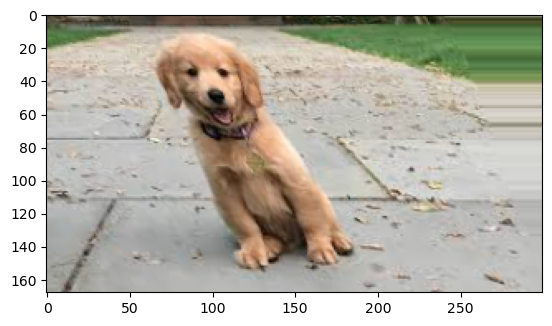

In [116]:
plt.imshow(augmented_img)

In [129]:
#zoom
generator=ImageDataGenerator(
    zoom_range=0.5
)

In [130]:
augment_img=generator.flow(img_array,batch_size=1)
augmented_img=next(augment_img)[0].astype('uint8')

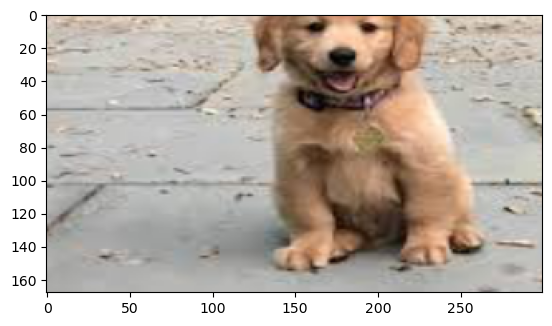

In [131]:
plt.imshow(augmented_img)

In [155]:
#flipping
generator=ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=False

)

In [156]:
augment_img=generator.flow(img_array,batch_size=1)
augmented_img=next(augment_img)[0].astype('uint8')

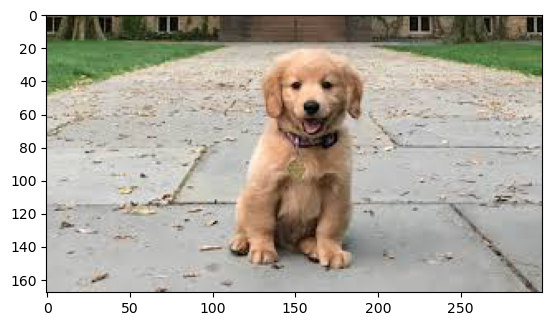

In [157]:
plt.imshow(augmented_img)

In [165]:
# Define various augmentation types
generators = {
    "Rotation": ImageDataGenerator(rotation_range=90),
    "Width Shift": ImageDataGenerator(width_shift_range=0.2),
    "Height Shift": ImageDataGenerator(height_shift_range=0.2),
    "Shear": ImageDataGenerator(shear_range=0.2),
    "Zoom": ImageDataGenerator(zoom_range=0.2),
    "Horizontal Flip": ImageDataGenerator(horizontal_flip=True),
    "Vertical Flip": ImageDataGenerator(vertical_flip=True),
    "Both Flip": ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
}

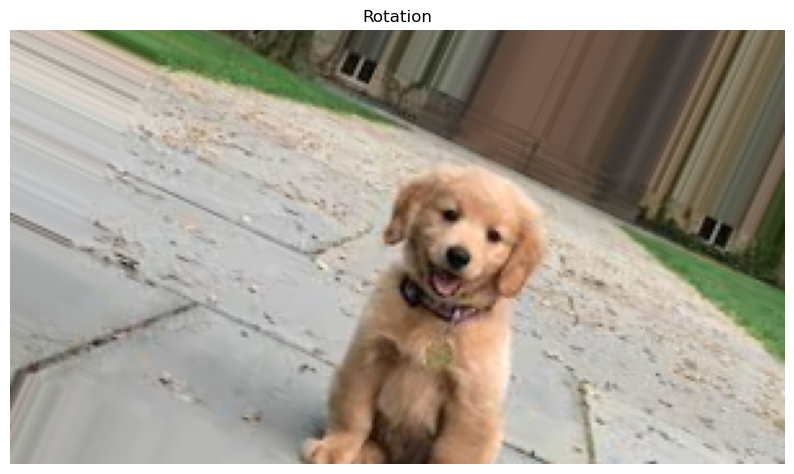

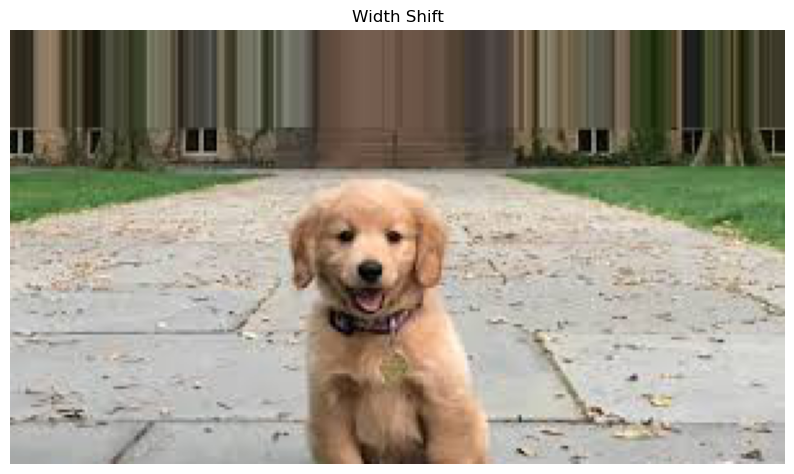

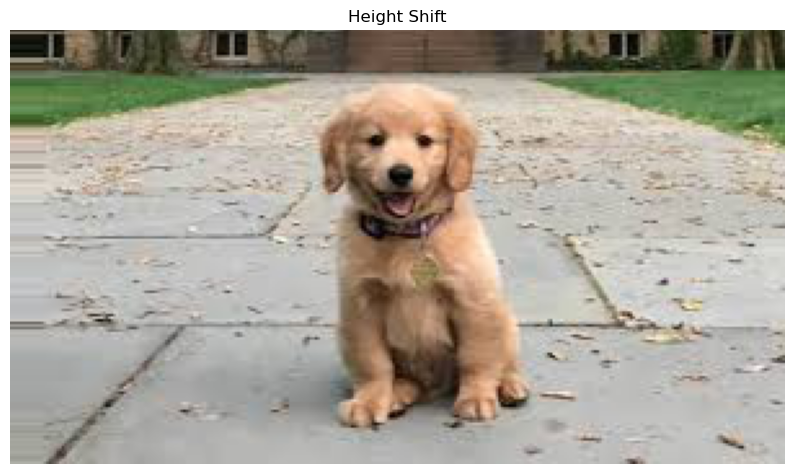

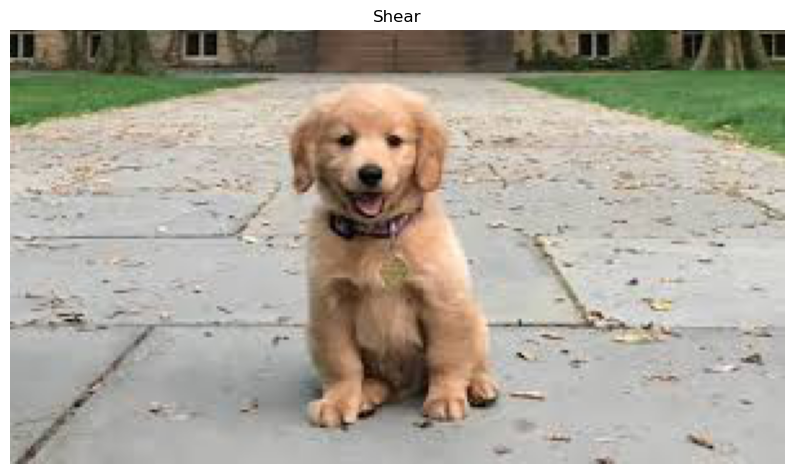

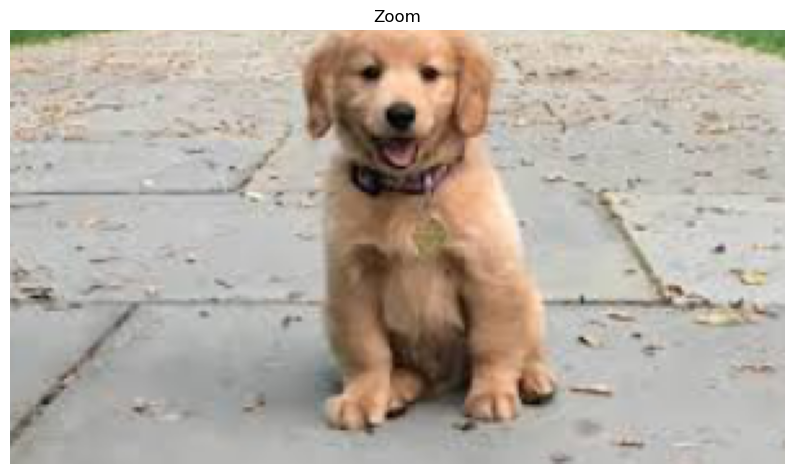

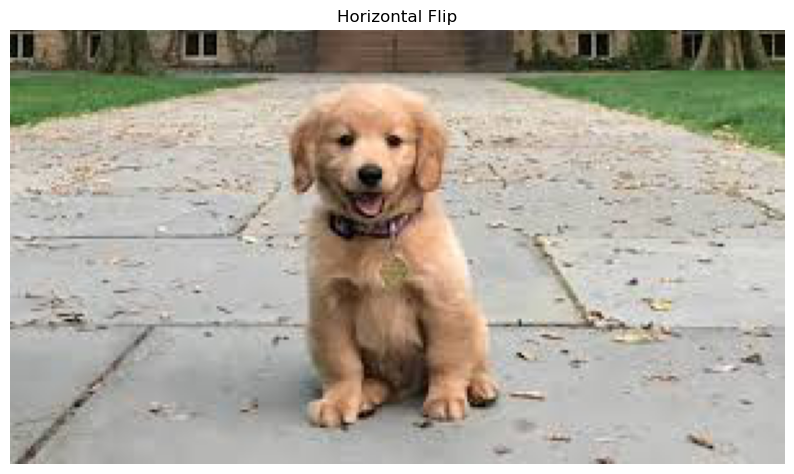

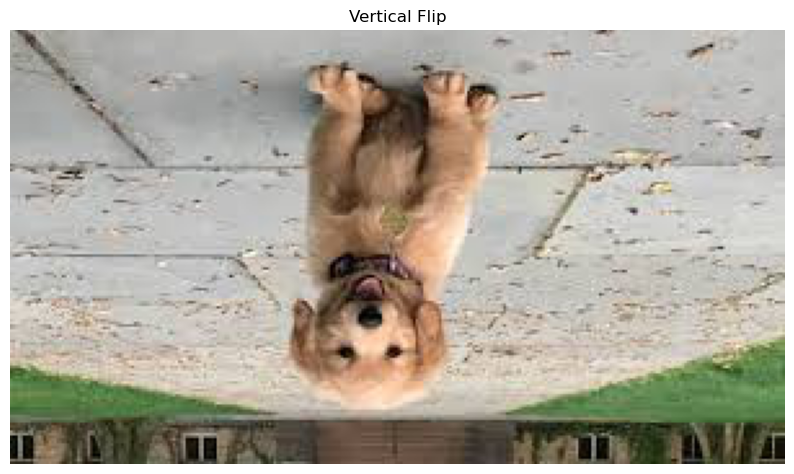

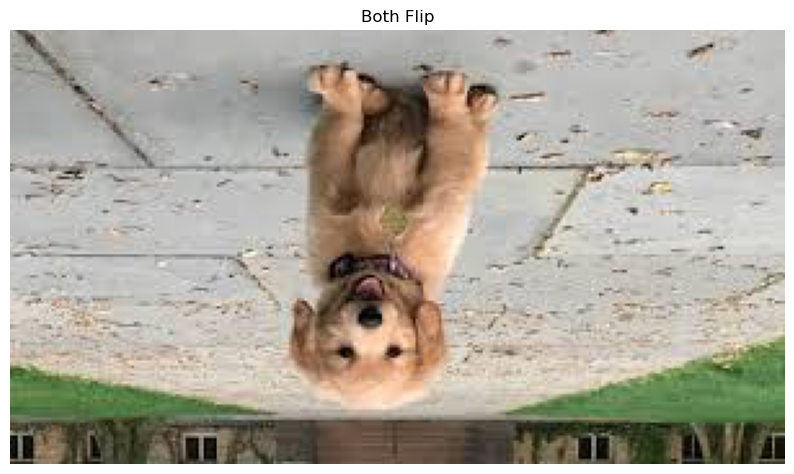

In [166]:
for id, gen in generators.items():
    augmented_imgs = next(gen.flow(img_array, batch_size=1))
    augmented_image = augmented_imgs[0].astype('uint8')
    plt.figure(figsize=(10, 10))
    plt.imshow(augmented_image)
    plt.title(id)
    plt.axis('off')
    plt.show()